# Visualizing word context from news articles
### Author - Parth Naik

## Contents
1. [Introduction](#Introduction)
2. [Background](#Background)
3. [Methodology](#Methodology)
4. [Discussion](#Discussion)
5. [Conclusion](#Conclusion)
6. [References](#References)

## Introduction
In today's digital world, almost everyone has access to electronic media and as a result world news now reach almost all parts of the globe. This has led to internet news publishing websites to have unprecendented opportunity to shape the readers' opinions around global/local issues. In this project I try to investigate how the news headlines and short description text might affect readers' perception by visualizing the word vectors obtained by using a skip-gram model on the news data corpus. The skip-gram model uses locality of words to infer which words have co-relation and uses these word, local_neighbour pair as a input, target pair for training a Auto-Encoder, the encoder part of the network is used for getting the vector representation of words. We use this representation to plot the words and see which words seem to be close together. The following is a brief description of the dataset - [about the data](#About-the-data).

## Background

There has a been an ever increasing notion of the huge role played by digital media in the shaping people's opinions in case of global/local issues. The fact that different publishing houses frame the same piece of news in a different way results in the same event to be viewed in different light depending on the publication the people choose to view. A classic example of this is CNN vs FOX news. However this notion is not new and has been described as 'agenda-setting theory'.

Agenda-setting theory describes the "ability (of the news media) to influence the importance placed on the topics of the public agenda". Agenda-setting theory was formally developed by Max McCombs and Donald Shaw in a study on the 1968 American presidential election. Agenda setting is a social science theory; it also attempts to make predictions. The theory also suggests that media has a great influence to their audience by instilling what they should think instead of what they think. That is, if a news item is covered frequently and prominently, the audience will regard the issue as more important.

Agenda-setting is the creation of public awareness and concern of salient issues by the news media. As well, agenda-setting describes the way that media attempts to influence viewers, and establish a hierarchy of news prevalence. Two basic assumptions underlie most researches on agenda-setting:

1. The press and the media do not reflect reality; they filter and shape it
2. Media concentration on a few issues and subjects leads the public to perceive those issues as more important than other issues.

These core statements were established by measuring the changes in salience through the use of surveys with the presence of more frequent news coverage.

One of the most critical aspects in the concept of an agenda-setting role of mass communication is the time frame for this phenomenon. Different media have different agenda-setting potential. From the perspective of agenda setting, the analysis of the relationship between traditional media and new virtual spaces has witnessed growing momentum. - https://en.wikipedia.org/wiki/Agenda-setting_theory

For example, A BBC article claims that the media had a big role to play in the results of the last U.S presedential election. https://www.bbc.com/news/entertainment-arts-37952249

#### This project as a result tries to visualize how and which words in the news data corpus appear close/far from each other due to their use in news headlines and short descriptions which would to some extent indicate the notion the articles convey.

### About the data
This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. This data is compiled by a Kaggle user(rmisra) and exists as a Kaggle dataset. We download this data in the form of a .json file using the kaggle API. We load this data as a pandas dataframe so as to make it easy for us to do further pre-processing.

## Methodology
The process of obtaining word vectors from a text corpus encompasses several data pipeline steps as follows:
1. [Getting the data](#Getting-the-data)
2. [Loading the data](#Loading-the-data)
3. [Exploring the data](#Exploring-the-data)
3. [Data Pre-processing](#Data-pre-processing)
4. [Modelling](#Modelling)
5. [Generating Visualizations](#Results)

In [0]:
# Import the necessary libraries

# Array ops
import numpy as np

# Data manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Deep learning library
import tensorflow as tf

### Getting the data
The data consisting of HuffPost news articles from 2012 - 2018 is compiled and submitted to Kaggle. In this project we use Google Colab as our platform of choice. Kaggle has a python library which can be used to import Kaggle datasets into colab. The Kaggle library needs the user Kaggle API key and the dataset key to fetch the dataset. The fetched dataset is in the form of a .json document.

In [0]:
# Make sure kaggle is installed
!pip install kaggle

In [0]:
# Upload the kaggle.json file
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Move it to the required position
!mv kaggle.json /root/.kaggle/kaggle.json
# Change the permissions
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Download the data
!kaggle datasets download -d rmisra/news-category-dataset

100% 25.0M/25.1M [00:00<00:00, 48.8MB/s]
100% 25.1M/25.1M [00:00<00:00, 99.5MB/s]


In [0]:
# Unzip the data
!unzip news-category-dataset.zip

Archive:  news-category-dataset.zip
  inflating: News_Category_Dataset_v2.json  


### Loading the data
In this project I used the pandas library to load and process the .json document. Initially we load the .json document as a dataframe which makes it very convenient to manipulate and explore the data.

In [0]:
# Import the data as a pandas dataframe
news_data = pd.read_json('News_Category_Dataset_v2.json',lines=True)
news_data.head(5)

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


### Exploring the data
After loading the .json document as a pandas dataframe we check the dataframe for null values. We can see that the dataframe has 6 columns.
1. Author - Author of the news article.
2. Category - Category of the news article. In all there are 41 categories, we merge 2 categories - 'WORLDPOST' and 'WORLD NEWS' because of the similarity of the articles resulting in 40 categories.
3. Date - Date the article was published.
4. Headline - The headline of the news article.
5. Link - The link to the article.
6. Short_Description - A short description of the news

We use the headlines + short_description as our text corpus for training our skip-gram model.

In [0]:
# Check for null values
news_data.isnull().sum()

authors              0
category             0
date                 0
headline             0
link                 0
short_description    0
dtype: int64

In [0]:
# Check the category numbers
news_data['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [0]:
# How are the WORLDPOST and WORLDNEWS articles different
news_data.loc[(news_data['category']=='WORLDPOST') | (news_data['category']=='WORLD NEWS'),]

,authors,category,date,headline,link,short_description
11,,WORLD NEWS,2018-05-26,South Korean President Meets North Korea's Kim...,https://www.huffingtonpost.com/entry/south-kor...,The two met to pave the way for a summit betwe...
23,"Josh Smith and Christine Kim, Reuters",WORLD NEWS,2018-05-25,North Korea Still Open To Talks After Trump Ca...,https://www.huffingtonpost.com/entry/north-kor...,Trump’s announcement came after repeated threa...
24,,WORLD NEWS,2018-05-25,2 Men Detonate Bomb Inside Indian Restaurant N...,https://www.huffingtonpost.com/entry/mississau...,"Fifteen people were taken to the hospital, thr..."
25,Antonia Blumberg,WORLD NEWS,2018-05-25,Thousands Travel Home To Ireland To Vote On Ab...,https://www.huffingtonpost.com/entry/irish-tra...,Just try to read these #HomeToVote tweets with...
26,,WORLD NEWS,2018-05-25,Irish Voters Set To Liberalize Abortion Laws I...,https://www.huffingtonpost.com/entry/ireland-a...,Vote counting will begin Saturday.
57,"Roberta Rampton and Christine Kim, Reuters",WORLD NEWS,2018-05-25,Trump Suggests North Korea Summit Could Still ...,https://www.huffingtonpost.com/entry/trump-nor...,He had canceled the planned June 12 summit les...
73,Dominique Mosbergen,WORLD NEWS,2018-05-24,North Korea Threatens Again To Call Off Trump ...,https://www.huffingtonpost.com/entry/north-kor...,"A top Pyongyang official lambasted ""political ..."
74,"Anthony Deutsch, Reuters",WORLD NEWS,2018-05-24,Investigation Finds Russian Missile Shot Down ...,https://www.huffingtonpost.com/entry/mh17-hit-...,It's not clear who was operating the missile t...
75,,WORLD NEWS,2018-05-24,North Korea Demolishes Tunnels At Nuclear Test...,https://www.huffingtonpost.com/entry/north-kor...,North Korea has conducted all six of its nucle...
76,Jesselyn Cook and Nick Robins-Early,WORLD NEWS,2018-05-24,How Kim Jong Un ‘Baited’ Trump Into Canceling ...,https://www.huffingtonpost.com/entry/trump-nor...,Trump’s slapdash attempt at negotiations has l...


The WORLDPOST and the WORLD NEWS articles mostly appear to be same, therefore combining them into a category

In [0]:
# Merging the WORLDPOST and the WORLD NEWS categories
def merge(category):
  if category=='WORLDPOST':
    return 'WORLD NEWS'
  else:
    return category

news_data['category'] = news_data['category'].apply(merge)

In [0]:
# Check the category count again
news_data['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
WORLD NEWS         4756
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
RELIGION           2556
STYLE              2254
SCIENCE            2178
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, dtype: int64

#### A pie chart to look at the proportion of different categories

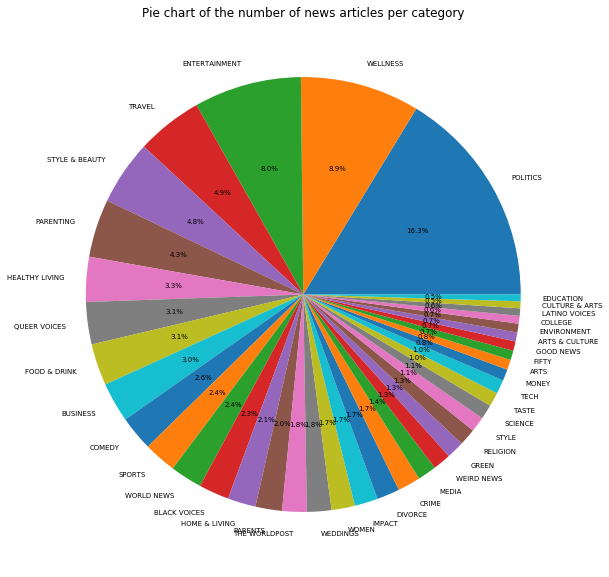

In [0]:
# Plot a pie chart
plt.rcParams["figure.figsize"] = (10,10)
patches, texts, autotexts = plt.pie(x=news_data['category'].value_counts().values,labels=news_data['category'].value_counts().index,autopct='%1.1f%%')
plt.setp(texts,size='x-small')
plt.setp(autotexts,size='x-small')
plt.title('Pie chart of the number of news articles per category')
plt.show()

### Data pre-processing
This is a very crucial step because the output of this step feeds into our skip-gram model for training and validation. This step has a number of substeps:
1. <b>Get the text corpus</b> - In this step we aggregate the headlines and short descriptions to get the text corpus.
2. <b>Train/valid corpus split</b> - In this step we segment our text corpus into training and validation sets which would be used to measure the performance of our skip-gram model.
3. <b>Cleaning the corpus</b> - Here we use the nltk library to remove punctuation marks (',",!) and stop words which are frequent words in language usage but have no inherent meaning like the, and, them etc.
4. <b>Creating mapping and reverse mapping dictionaries</b> - This step is crucial, for training the model we need to convert the words into one-hot vectors i.e. for this we need to represent each unique word with a unique integer. For example let's assign the integer 2 to the word 'fire' and lets assume the total number of unique words in our text corpus is 10, then the one-hot encoding of the word fire would be [0,0,1,0,0,0,0,0,0,0]. We hence create the mapping dict which is a mapping from unique words -> unique integers which helps us to convert the words into their one-hot representations. Also we create a reverse mapping dictionart which is a inversion of the mapping dict and allows us to convert the one-hot vectors into words.
5. <b>Translate the corpus</b> - Now as discussed in the previous point we use our mapping dict to convert our text corpus which is a series of words into a series of integers.
6. <b>Remove low frequency words</b> - We remove words which have occurred less than 10 time in our dataset because we can't get enough contextual information for these words.
7. <b>Generate skip-gram input, target pairs</b> - This step is quite detailed and explained below

#### Generate skip-gram input,target pairs
We’re going to train the neural network to do the following. Given a specific word in the middle of a sentence (the input word), look at the words nearby and pick one at random. The network is going to tell us the probability for every word in our vocabulary of being the “nearby word” that we chose.

When I say "nearby", there is actually a "window size" parameter to the algorithm. A typical window size might be 5, meaning 5 words behind and 5 words ahead (10 in total).
The output probabilities are going to relate to how likely it is find each vocabulary word nearby our input word. For example, if you gave the trained network the input word “Soviet”, the output probabilities are going to be much higher for words like “Union” and “Russia” than for unrelated words like “watermelon” and “kangaroo”.

We’ll train the neural network to do this by feeding it word pairs found in our training documents. The below example shows some of the training samples (word pairs) we would take from the sentence “The quick brown fox jumps over the lazy dog.” I’ve used a small window size of 2 just for the example. The word highlighted in blue is the input word.

Source - http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

In [2]:
# Example of the skip-gram word sampling
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://mccormickml.com/assets/word2vec/training_data.png")

In [0]:
# Create a text column which contains the headline + the short description
news_data['text'] = news_data['headline'] + " " + news_data['short_description']

In [0]:
# Train test split
from sklearn.model_selection import train_test_split
train, valid = train_test_split(news_data, test_size=0.3,random_state=7)

In [0]:
# Concatenate all the text to get a text corpus which is a list of sentences
train_text_corpus = train['text'].values.tolist()
valid_text_corpus = valid['text'].values.tolist()

In [0]:
# Download the nltk stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Use nltk to get rid of the stop words and the punctuation marks
from nltk import word_tokenize 
from nltk.corpus import stopwords
from string import punctuation

# Removal list
to_remove = stopwords.words('english') + list(punctuation) + ['""','``',"''","'s","n't",'’','--','“',"'ve","'re",'0','1','2','3','4','5','6','7','8','9']

# A list containing lists containing the words of the sentence after removing the punctuations and stop words
tokenized_corpus = []
# Tokenized corpus
for sentence in train_text_corpus:
  tokenized_corpus.append(word_tokenize(sentence.lower()))

# Delete the text corpus
del train_text_corpus
  
print('Word tokenization done')
print('Removing stopwords and punctuations to clean the sentences')

# Filter the corpus
cleaned_corpus = []
for sentence in tokenized_corpus:
  cleaned_corpus.append([i for i in sentence if i not in to_remove])
  
# Delete the tokenized corpus
del tokenized_corpus

print('Filtering done')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Word tokenization done
Removing stopwords and punctuations to clean the sentences
Filtering done


In [0]:
def createDicts(data):
  # Numeric value associated with the words
  num_val = 0
  # The dictionary
  mapping_dict = {}
  # Assign a unique value for each unique word
  for word in data:
    if word in mapping_dict.keys():
      continue
    else:
      mapping_dict[word] = num_val
      num_val += 1
  # Create the reverse dictionary
  reverse_mapping_dict = dict(zip(mapping_dict.values(),mapping_dict.keys()))
  
  return mapping_dict, reverse_mapping_dict

mapping_dict, reverse_dict = createDicts([y for x in cleaned_corpus for y in x]) # List comprehension allows us to flatten our list of lists into a single list

In [0]:
# Remove low frequency words i.e words which have occurence frequency less than 10 a encoding of -1 and later remove them from our corpus
from collections import Counter
words = [y for x in cleaned_corpus for y in x]

print('Finding word frequencies')
frequencies = Counter(words).most_common()

print('Collecting words having less than 10 occurences')

# Collect the low frequency words
low_freq = []
for entry in frequencies:
  if entry[1] < 10:
    low_freq.append(entry[0])

Finding word frequencies


In [0]:
# Set the encoding of the low frequency words to -1 as a unk token
for word in low_freq:
  mapping_dict.pop(word)
  
# mapping_dict['unk'] = len(mapping_dict.keys())
  
# Re number the word values
mapping_dict_new = dict(zip(mapping_dict.keys(),[i for i in range(len(mapping_dict.keys()))]))
  
# Update the reverse dictionary
reverse_dict = dict(zip(mapping_dict_new.values(),mapping_dict_new.keys()))

In [0]:
def buildDataset(mapping_dict,corpus):
  """
  Encode the entire text corpus as numerical values using the mapping dictionary
  """
  # List of the numeric word values
  encoded_corpus = []
  # Encode
  for sentence in corpus:
    sentence_encoded = []
    for word in sentence:
      sentence_encoded.append(mapping_dict.get(word,-1))
    encoded_corpus.append(sentence_encoded)
  
  return encoded_corpus

train_encoded_corpus = buildDataset(mapping_dict_new,cleaned_corpus)

In [0]:
# Validation encodings
# Tokenized corpus
valid_tokenized_corpus = []
for sentence in valid_text_corpus:
  valid_tokenized_corpus.append(word_tokenize(sentence.lower()))

In [0]:
# Encode the validation
valid_encoded_corpus = buildDataset(mapping_dict_new,valid_tokenized_corpus)

In [0]:
# Remove low frequency words for the train set
# The -1s represent the less frequent words which are to be removed
final_corpus = []
for sentence in train_encoded_corpus:
  final_corpus.append([i for i in sentence if i != -1])

# Update the encoded corpus  
del train_encoded_corpus
train_encoded_corpus = final_corpus.copy()
del final_corpus

In [0]:
# Remove low frequency words for the test set
# The -1s represent the less frequent words which are to be removed
final_corpus = []
for sentence in valid_encoded_corpus:
  final_corpus.append([i for i in sentence if i != -1])

# Update the encoded corpus  
del valid_encoded_corpus
valid_encoded_corpus = final_corpus.copy()
del final_corpus

In [0]:
# Define a constant sentence index
sentence_index = 0
# Number of distinct words
vocab_length = len(mapping_dict.keys())
# Total number of words
total_words = len([y for x in train_encoded_corpus for y in x])

In [0]:
vocab_length

19729

In [0]:
def getBatch(corpus=encoded_corpus,batch_size=40):
  # The training batch
  batch_X = np.empty(shape=[batch_size,vocab_length])
  batch_y = np.empty(shape=[batch_size,vocab_length])
  
  # The number of batch entries
  batch_counter = 0
  
  # The global sentence index
  global sentence_index
  
  while sentence_index < len(corpus):
    # The sentence
    sentence = corpus[sentence_index]
    # The input/center word
    data_index = 0
    while data_index < len(sentence):
      # The surrounding skip-words having a window size of 2 i.e. 2 to the left & 2 to the right
      skp_word_indices = [data_index-2,data_index-1,data_index+1,data_index+2]
      # Create a one-hot vector for the central word
      input_one_hot = np.zeros(shape=[vocab_length])
      input_one_hot[sentence[data_index]] = 1

      # Create pairs with the batches with the skip words
      for skp_word_index in skp_word_indices:
        if skp_word_index < 0:
          continue
        elif skp_word_index >= len(sentence):
          continue
        # Create a one-hot vector for the target
        target_one_hot = np.zeros(shape=[vocab_length])
        target_one_hot[sentence[data_index]] = 1
        # Include the pair in the batch
        batch_X[batch_counter,] = input_one_hot
        batch_y[batch_counter,] = target_one_hot
        # Increment the counter
        batch_counter += 1
        # Check if batch is filled
        if batch_counter == batch_size:
          return batch_X, batch_y
          # Reset the batch counter
          batch_counter = 0
      
      # Go to the next word
      data_index += 1
    
    # Increment the sentence index
    sentence_index += 1
    
    # Loop back to the first sentence
    if sentence_index == (len(corpus)):
      sentence_index = 0

In [0]:
# Test the batching function
batch_X, batch_y = getBatch()
# Print the batch shapes
print("X shape = ",batch_X.shape)
# Print the batch shapes
print("y shape = ",batch_y.shape)
# Print the sentence index
print("The global sentence index = ",sentence_index)

In [0]:
# Try to precompute the batches
X_batches = []
y_batches = []
for batch_no in range(10000):
  batch_X, batch_y = getBatch()
  X_batches.append(batch_X)
  y_batches.append(batch_y)
  
  if batch_no % 100 == 0:
    print("Number of batches stored =",len(X_batches))

In [0]:
batch_X

The batching function works! Now the next step is to define the network using tf and train it using the batches obtained from our batching function.

In [0]:
def getBatchGenTrain(batch_size=500):
  # The training batch
  batch_X = np.empty(shape=[batch_size,vocab_length])
  batch_y = np.empty(shape=[batch_size,vocab_length])
  
  # The global sentence index
  global sentence_index
  
  # Batch counter stores the number of entries put in a batch after each iteration
  batch_counter = 0
  
  while True:
    # The sentence
    sentence = train_encoded_corpus[sentence_index]
    # The input/center word
    data_index = 0
    while data_index < len(sentence):
      if data_index == 0:
        # The next 2 words form the window
        skp_word_indices = [data_index+1,data_index+2] 
      elif data_index == (len(sentence)-1):
        # The previous 2 words
        skp_word_indices = [data_index-2,data_index-1]
      else:
        # The surrounding skip-words having a window size of 2 i.e. 2 to the left & 2 to the right
        skp_word_indices = [data_index-2,data_index-1,data_index+1,data_index+2]
      
      # Create a one-hot vector for the central word
      input_one_hot = np.zeros(shape=[vocab_length])
      input_one_hot[sentence[data_index]] = 1

      # Create pairs with the batches with the skip words
      for skp_word_index in np.random.choice(skp_word_indices,size=2,replace=False):
        if skp_word_index < 0:
          continue
        elif skp_word_index >= len(sentence):
          continue
        # Create a one-hot vector for the target
        target_one_hot = np.zeros(shape=[vocab_length])
        target_one_hot[sentence[data_index]] = 1
        # Include the pair in the batch
        batch_X[batch_counter,] = input_one_hot
        batch_y[batch_counter,] = target_one_hot
        # Increment the counter
        batch_counter += 1
        # Check if batch is filled
        if batch_counter == batch_size:
          yield(batch_X, batch_y)
          # Reset the batch counter
          batch_counter = 0
      
      # Go to the next word
      data_index += 1

    # Increment the sentence index
    sentence_index += 1

    # Loop back to the first sentence
    if sentence_index == (len(train_encoded_corpus)):
      sentence_index = 0

In [0]:
def getBatchGenValid(batch_size=1000):
  # The training batch
  batch_X = np.empty(shape=[batch_size,vocab_length])
  batch_y = np.empty(shape=[batch_size,vocab_length])
  
  while True:
    for i in range(batch_size):
      # Random sentence index
      sentence_index = np.random.randint(0,len(valid_encoded_corpus))
      # Random sentence
      sentence = valid_encoded_corpus[sentence_index]
      # Random word
      if len(sentence)!=0:
        data_index = np.random.randint(0,len(sentence))
      else:
        continue

      if data_index == 0:
        # The next 2 words form the window
        skp_word_indices = [data_index+1,data_index+2] 
      elif data_index == (len(sentence)-1):
        # The previous 2 words
        skp_word_indices = [data_index-2,data_index-1]
      else:
        # The surrounding skip-words having a window size of 2 i.e. 2 to the left & 2 to the right
        skp_word_indices = [data_index-2,data_index-1,data_index+1,data_index+2]

      # Create a one-hot vector for the central word
      input_one_hot = np.zeros(shape=[vocab_length])
      input_one_hot[sentence[data_index]] = 1

      # Create pairs with the batches with the skip words
      for skp_word_index in np.random.choice(skp_word_indices,size=1,replace=False):
        if skp_word_index < 0:
          continue
        elif skp_word_index >= len(sentence):
          continue
        # Create a one-hot vector for the target
        target_one_hot = np.zeros(shape=[vocab_length])
        target_one_hot[sentence[data_index]] = 1
        # Include the pair in the batch
        batch_X[i,] = input_one_hot
        batch_y[i,] = target_one_hot

    yield(batch_X,batch_y)       

### Modelling
The output of the previous step i.e. data pre-processing consisted of mapping and reverse mapping dictionaries along with the encoded text corpus generated using the mapping dictionary. After the previous step we defined generators which are nothing but efficient pipelines to feed our encoded data corpus to our models in small chunks.

With all this infrastructure setup now we use the keras library on top of the tensorflow library by Google to define our deep neural network. The model which we define here is an AutoEncoder model which means that the model is trained to regenerate the input from a smaller representation(word vectors). This small representation or word vectors contain condensed information regarding the context in which different words are used in our text corpus(news headline + short description).

Following is the intuition of how the skip-gram model works:
If two different words have very similar “contexts” (that is, what words are likely to appear around them), then our model needs to output very similar results for these two words. And one way for the network to output similar context predictions for these two words is if the word vectors are similar. So, if two words have similar contexts, then our network is motivated to learn similar word vectors for these two words! Ta da!

And what does it mean for two words to have similar contexts? I think you could expect that synonyms like “intelligent” and “smart” would have very similar contexts. Or that words that are related, like “engine” and “transmission”, would probably have similar contexts as well.

This can also handle stemming for you – the network will likely learn similar word vectors for the words “ant” and “ants” because these should have similar contexts. - http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

#### This is how our AutoEncoder looks

In [1]:
# Example of the skip-gram word sampling
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://lilianweng.github.io/lil-log/assets/images/word2vec-skip-gram.png")

#### The N-dimension vector obtained in the hidden layer is our word vector!

In [0]:
# Try making the model using keras 
# from tensorflow import keras
from keras.models import Sequential
from keras import layers

word2vec = Sequential()
word2vec.add(layers.Dense(100,activation='relu',input_shape=(vocab_length,),name='encoding_layer'))
word2vec.add(layers.Dense(vocab_length,activation='softmax',name='decoding_layer'))

word2vec.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

word2vec.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoding_layer (Dense)       (None, 100)               1973000   
_________________________________________________________________
decoding_layer (Dense)       (None, 19729)             1992629   
Total params: 3,965,629
Trainable params: 3,965,629
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [0]:
# Train the created model
batch_size = 1000
steps = ((total_words - len(train_encoded_corpus))*2)/batch_size

# Setup callbacks to save the best model and early stopping if val loss doesn't decrease after 2 epochs
# https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history = word2vec.fit_generator(generator=getBatchGenTrain(batch_size),steps_per_epoch=steps,validation_data=getBatchGenValid(batch_size),validation_steps=2,callbacks=callbacks,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4281/4280 [==============================] - 930s 217ms/step - loss: 6.9055 - acc: 0.2692 - val_loss: 3.8084 - val_acc: 0.6530
Epoch 2/10
4281/4280 [==============================] - 926s 216ms/step - loss: 5.3735 - acc: 0.4720 - val_loss: 2.8121 - val_acc: 0.7560
Epoch 3/10
4281/4280 [==============================] - 922s 215ms/step - loss: 4.9535 - acc: 0.5201 - val_loss: 2.4679 - val_acc: 0.7905
Epoch 4/10
4281/4280 [==============================] - 924s 216ms/step - loss: 4.7258 - acc: 0.5472 - val_loss: 2.0134 - val_acc: 0.8420
Epoch 5/10
4281/4280 [==============================] - 921s 215ms/step - loss: 4.5951 - acc: 0.5645 - val_loss: 2.0545 - val_acc: 0.8425
Epoch 6/10
4281/4280 [==============================] - 920s 215ms/step - loss: 4.5148 - acc: 0.5744 - val_loss: 1.9416 - val_acc: 0.8570
Epoch 7/10
4281/4280 [==============================] - 923s 216ms/step - loss: 4.4834 - acc: 0.5791 - val_loss: 1.8979 - va

In [0]:
# Save the model
model_json = word2vec.to_json()
with open("word2vec_arch.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
word2vec.save_weights("word2vec_weights.h5")
print("Saved model to disk")

# Download the model files
from google.colab import files
files.download("word2vec_arch.json")
files.download("word2vec_weights.h5")
print("Downloaded model locally")

In [0]:
# Upload the model files
from google.colab import files
uploaded = files.upload()

Saving word2vec_arch_new.json to word2vec_arch_new.json
Saving word2vec_weights_new.h5 to word2vec_weights_new.h5


In [0]:
#Load our model
from keras.models import model_from_json
from keras import optimizers

# load json and create model
json_file = open("word2vec_arch_new.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("word2vec_weights_new.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Loaded model from disk


In [0]:
# Create a separate encoding model using the weights from the previously trained model
# The new model only has the encoding layers and hence gives us the embeddings for the inputs
from keras.models import Sequential

encoder = Sequential()
encoder.add(loaded_model.layers[0])
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoding_layer (Dense)       (None, 100)               1973000   
Total params: 1,973,000
Trainable params: 1,973,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Get the representations for all the words
# vocab_length = 19727
embeddings = np.zeros(shape=[vocab_length,vocab_length])

for value in range(vocab_length):
  # Create the one hot embedding
  temp = np.zeros(shape=[vocab_length])
  temp[value] = 1
  embeddings[value] = temp

In [0]:
# Predict their embeddings
embeddings = encoder.predict(embeddings)

In [0]:
# Save the dimension reduced embeddings
np.save('word_embeddings',embeddings)

In [0]:
# Reduce the dimensionality to 2 for plotting them
from sklearn.manifold import TSNE

embeddings_2d = TSNE(n_components=2).fit_transform(embeddings)

In [0]:
# Save the dimension reduced embeddings
np.save('embeddings_2d_new',embeddings_2d)

## Results
### Visualizing Word Vectors
Finally after training our model we get word vectors for the frequent words in our corpus. We reduce the dimensionality of these vectors to be able to represent them in a 2D plot. Below we can see the plot of the word vectors in a 2D plot. We can from this plot infer the context of the words used in news articles. For example, towards the top right of the plot, we can see that 'happy' and 'equality' are close by indicating similarity in context. Also towards the bottom left we can see that the owrds 'terrifying' and 'rivarly' are very close to each other indicating very similar context. We can also see that towards the mid left of the plot 'young' and 'vacation' are very close which may convey the implicit context that the news articles tend to use these words together which may or may not influence the readers.

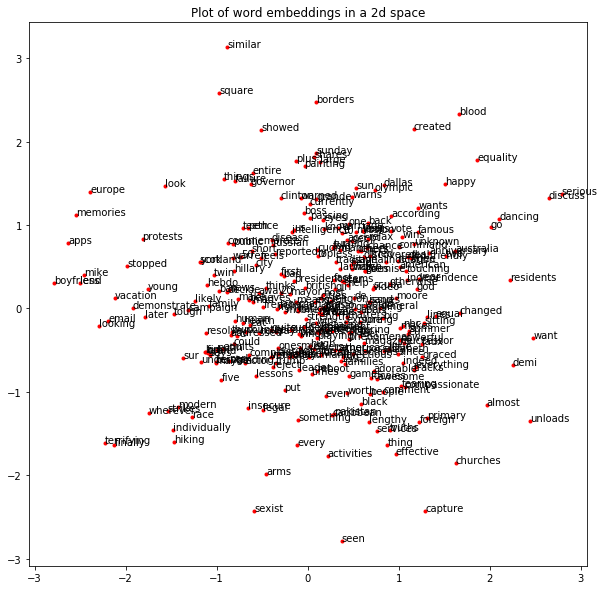

In [0]:
plt.plot(embeddings[:300,0],embeddings_2d[:300,1],'r.')

for i, txt in enumerate(list(mapping_dict.keys())[:300]):
  plt.annotate(txt,(embeddings[i,0],embeddings_2d[i,1]))
  
plt.title('Plot of word embeddings in a 2d space')
plt.show()

## Discussion
As we saw in the results section using a visual plot of the word vectors we can get the context in which these words are used. This project used articles from only 1 news source(HuffPost) but it is possible to get generate such plots for multiple news sources which would then give us an idea of how contextual similar or dissimilar are the same words but from different sources. For example, a certain word like 'refugees' might have different context (surrounding words) depending upon which news source we use.

The big data course allowed me to first visualize and frame a data pipeline consisting of data loading, exploration, pre-processing, modelling and then documentation in the form of this Jupyter Notebook. The sections on data quality enabled me to think about how I could refine/clean my data, for example removing stopwords, removing less frequent words. The analytics section helped me formulate my problem statement and the modelling and visualization tasks I had to perform in order to achieve the expected results. The strategy section helped me to decide how to plan out these steps and if this project was viable.

The biggest challenge I faced was pre-processing the large amount of textual data. The pre-processing of the textual corpus involved cleaning the data, creating mapping and reverse-mapping dictionaries and then encoding and decoding the corpus using these dictionaries. Another challenge I faced was the lack of compute resources, training the skip-gram model on such a large dataset is very resource intensive which is one of the reasons why I choose Google Colab to do this project. Even then I could train my model for only 10 epochs, ideally I would have like to train my model for atleast 100 epochs. 

## Conclusion
In this project I used a text corpus obtained from the headlines and short descriptions of news articles to get embeddings for the words in the corpus using the skip-gram model and visualized these words using their embeddings in a 2D plot. This plot allows us to get an idea of the context in which these words were used. We can plot such graphs for different sources of news to find the similarities/dissimilarities in word contexts.

## References
1. Dataset - https://www.kaggle.com/rmisra/news-category-dataset
2. Motivation -  https://en.wikipedia.org/wiki/Agenda-setting_theory
3. Text data pre-processing - https://towardsdatascience.com/effectively-pre-processing-the-text-data-part-1-text-cleaning-9ecae119cb3e
4. Pre-processing for skip gram model - http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
5. Skip-gram model - http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
6. Dimesionality reduction for generating the plot - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html